In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
from classes import Portfolio
import yfinance as yf
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from asset_database import DICT_ASSET_INFO
from tools import get_position,get_value,plot_position_graph,plot_position_table,plot_earnings_in_last_months,plot_dividends_in_last_months,generate_list_of_dates
from historico_tesouro.tresury_history import DICT_TRESURY_HISTORY
from data_base import GLOBAL_DATA_BASE

current_path = Path.cwd()
GLOBAL_DATA_BASE = GLOBAL_DATA_BASE

In [6]:
portfolio_luiz = Portfolio(GLOBAL_DATA_BASE[GLOBAL_DATA_BASE["owner"]=="Luiz"].drop("owner",axis=1),"Luiz")
portfolio_luciane = Portfolio(GLOBAL_DATA_BASE[GLOBAL_DATA_BASE["owner"]=="Luciane"].drop("owner",axis=1),"Luciane")

CIEL3.SA: No price data found, symbol may be delisted (1d 2024-08-31 19:12:04.589198 -> 2024-09-07 19:12:04.589198)
CIEL3.SA: Data doesn't exist for startDate = 1725747124, endDate = 1726351924
CIEL3.SA: Data doesn't exist for startDate = 1726351924, endDate = 1726956724
CIEL3.SA: Data doesn't exist for startDate = 1726956724, endDate = 1727561524


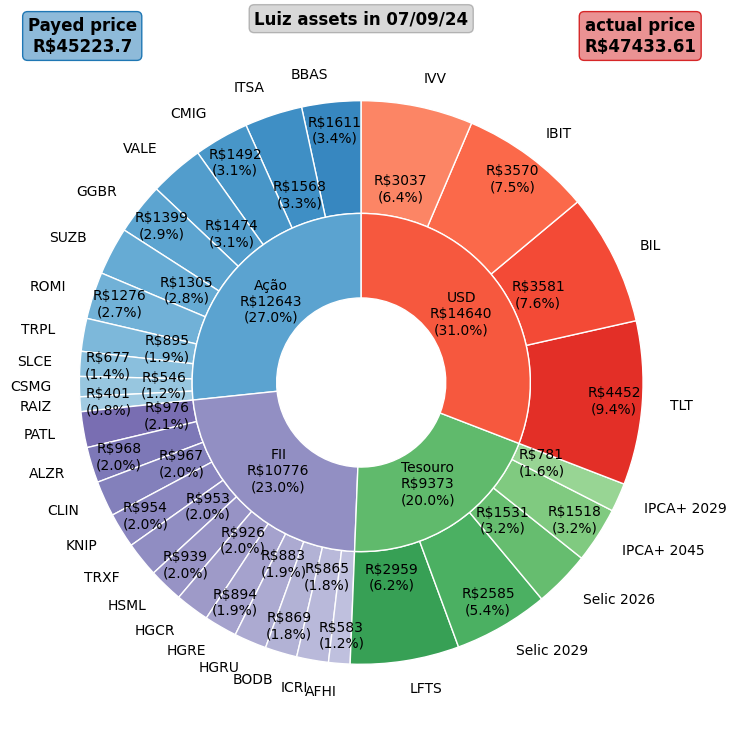

CIEL3.SA: No price data found, symbol may be delisted (1d 2024-08-31 19:12:04.589198 -> 2024-09-07 19:12:04.589198)
CIEL3.SA: Data doesn't exist for startDate = 1725747124, endDate = 1726351924
CIEL3.SA: Data doesn't exist for startDate = 1726351924, endDate = 1726956724
CIEL3.SA: Data doesn't exist for startDate = 1726956724, endDate = 1727561524


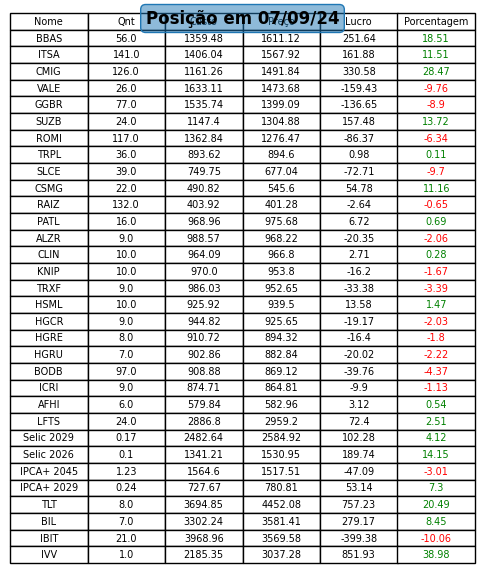

In [7]:
plot_position_graph(portfolio_luiz)
plot_position_table(portfolio_luiz)

In [ ]:
GLOBAL_DATA_BASE

In [ ]:
owner="Luiz"
date=pd.Timestamp(2024,8,7)
ticker=["ITSA4","RAIZ4","CSMG3","ICRI11","HGRE11"]
buy=[True,True,True,True,True]
price=[9.96,3.06,26.43,21.79,97.19,113.84]
amount=[19,66,8,14,9,8]
data_base = GLOBAL_DATA_BASE

In [ ]:
4*["Luiz"]

In [ ]:
for i,ticker in enumerate(ticker):
    data_base

In [ ]:
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Step 1: Retrieve the current index
current_index = df.index

# Step 2: Sort the index in decreasing order
sorted_index = sorted(current_index, reverse=True)

# Step 3: Reindex the DataFrame with the sorted index
df_reindexed = df.reindex(sorted_index)

print("\nDataFrame with index in decreasing order:")
print(df_reindexed)

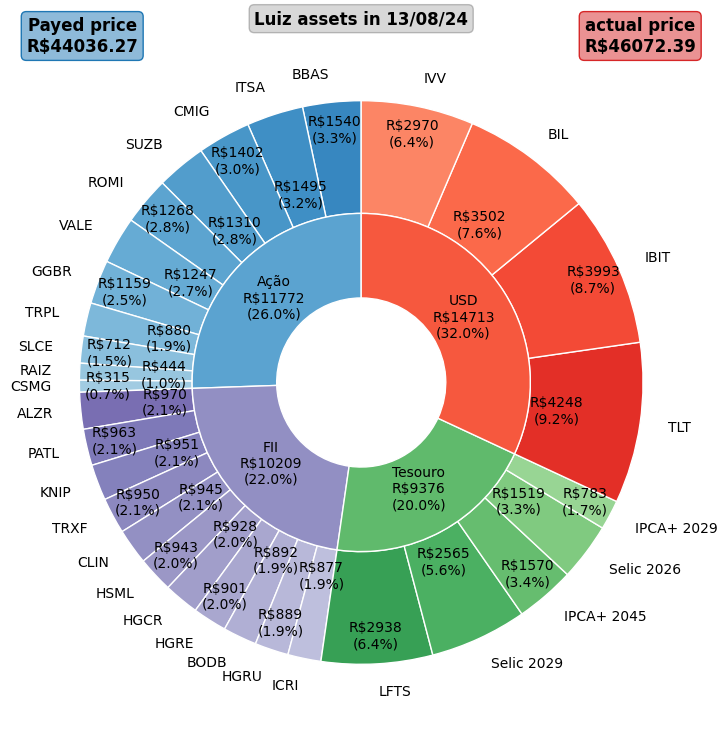

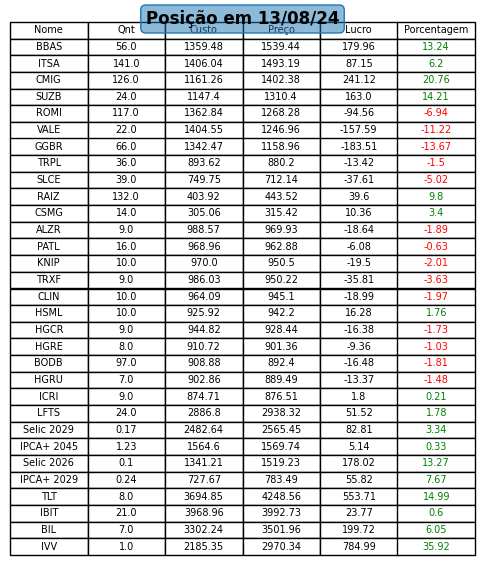

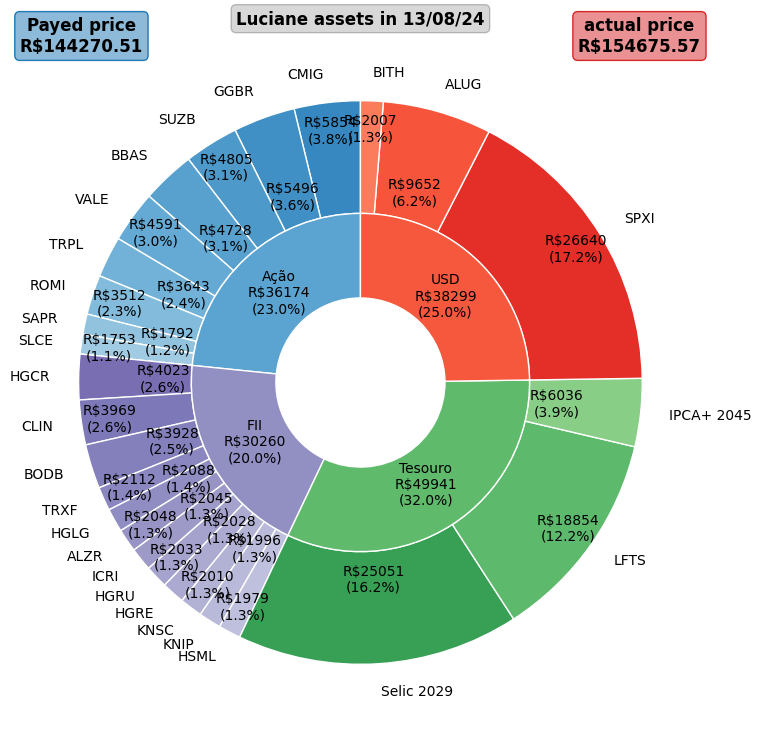

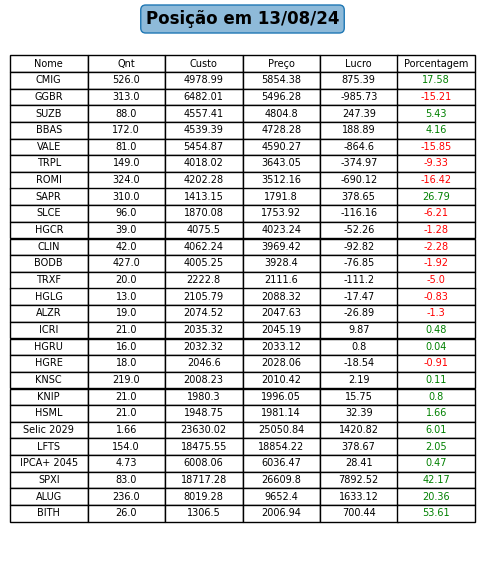

In [6]:
plot_position_graph(portfolio_luciane)
plot_position_table(portfolio_luciane)

In [ ]:
###### ploting ploting earnings and dividends in last months #####
plot_earnings_in_last_months(portfolio_luciane,delta_months=3)
plot_dividends_in_last_months(portfolio_luciane,delta_months=3)
plot_earnings_in_last_months(portfolio_luciane,delta_months=3)
plot_dividends_in_last_months(portfolio_luciane,delta_months=3)